In [39]:
# scipy 


In [40]:
from scipy.optimize import minimize
import numpy as np

In [41]:
def objective(x):
    return x[0]*x[3]*(x[0]+x[1]+x[2])+x[2]


In [42]:
def constraint1(x):
    return x[0]*x[1]*x[2]*x[3]-25.0


In [43]:
def constraint2(x):
    sum_eq = 40.0
    for i in range(4):
        sum_eq = sum_eq - x[i]**2
    return sum_eq


In [44]:
n = 4
x0 = np.zeros(n)
x0[0] = 1.0
x0[1] = 5.0
x0[2] = 5.0
x0[3] = 1.0


In [45]:
print('Initial Objective: ' + str(objective(x0)))


Initial Objective: 16.0


In [46]:
b = (1.0,5.0)
bnds = (b, b, b, b)
con1 = {'type': 'ineq', 'fun': constraint1}
con2 = {'type': 'eq', 'fun': constraint2}
cons = ([con1,con2])
solution = minimize(objective,x0,method='SLSQP',\
                    bounds=bnds,constraints=cons)
x = solution.x


In [47]:
print('Final Objective: ' + str(objective(x)))


Final Objective: 17.01401724563517


In [48]:
# print solution
print('Solution')
print('x1 = ' + str(x[0]))
print('x2 = ' + str(x[1]))
print('x3 = ' + str(x[2]))
print('x4 = ' + str(x[3]))


Solution
x1 = 1.0
x2 = 4.742996096883977
x3 = 3.8211546234095715
x4 = 1.379407645075325


In [49]:
pip install gekko

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
from gekko import GEKKO    
import numpy as np

In [51]:
m = GEKKO()
x = m.Array(m.Var,4,value=1,lb=1,ub=5)
x1,x2,x3,x4 = x

In [52]:
x2.value = 5; x3.value = 5

In [53]:
m.Equation(x1*x2*x3*x4>=25)

In [54]:
m.Equation(x1**2+x2**2+x3**2+x4**2==40)

In [55]:
m.Minimize(x1*x4*(x1+x2+x3)+x3)

In [56]:
m.solve()
print('x: ', x)
print('Objective: ',m.options.OBJFCNVAL)

apm 34.125.236.160_gk_model1 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            5
   Intermediates:            0
   Connections  :            0
   Equations    :            3
   Residuals    :            3
 
 Number of state variables:              5
 Number of total equations: -            2
 Number of slack variables: -            1
 ---------------------------------------
 Degrees of freedom       :              2
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

In [1]:
# Risk Analysis
# Monte Carlo 

In [2]:
import matplotlib.pyplot as plt
import random

In [5]:
def roll_dice():
    die_1 = random.randint(1, 6)
    die_2 = random.randint(1, 6)
    # Determining if the dice are the same number
    if die_1 == die_2:
      same_num = True
    else:
      same_num = False
    return same_num

In [6]:
# Inputs
num_simulations = 10000
max_num_rolls = 1000
bet = 1

In [7]:
# Tracking
win_probability = []
end_balance = []

(0.0, 1000.0)

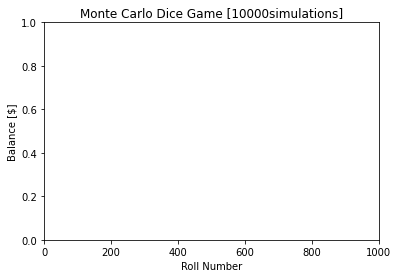

In [10]:
fig = plt.figure()
plt.title("Monte Carlo Dice Game [" + str(num_simulations) + "simulations]")
plt.xlabel("Roll Number")
plt.ylabel("Balance [$]")
plt.xlim([0, max_num_rolls])

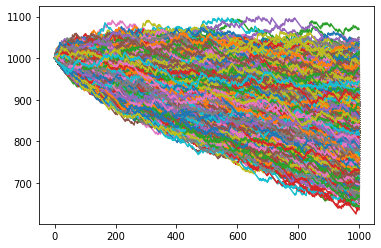

In [15]:
# For loop to run for the number of simulations desired
for i in range(num_simulations):
    balance = [1000]
    num_rolls = [0]
    num_wins = 0
    # Run until the player has rolled 1,000 times
    while num_rolls[-1] < max_num_rolls:
        same = roll_dice()
        # Result if the dice are the same number
        if same:
            balance.append(balance[-1] + 4 * bet)
            num_wins += 1
        # Result if the dice are different numbers
        else:
            balance.append(balance[-1] - bet)

        num_rolls.append(num_rolls[-1] + 1)
    # Store tracking variables and add line to figure
    win_probability.append(num_wins/num_rolls[-1])
    end_balance.append(balance[-1])
    plt.plot(num_rolls, balance)
# Showing the plot after the simulations are finished
plt.show()

In [16]:
# Averaging win probability and end balance
overall_win_probability = sum(win_probability)/len(win_probability)
overall_end_balance = sum(end_balance)/len(end_balance)

In [18]:
# Displaying the averages
print("Average win probability after "+ str(num_simulations) + "runs: " + str(overall_win_probability))
print("Average ending balance after " + str(num_simulations) + "runs: $" + str(overall_end_balance))

Average win probability after 10000runs: 0.16662129999999847
Average ending balance after 10000runs: $833.1065
